 This is the final version for my python notebook.
 The dataset has been downloaded from Kaggle. I am attaching the link to the dataset below:
 Kaggle dataset: https://www.kaggle.com/datasets/saurabhbadole/bank-customer-churn-prediction-dataset . This dataset is downloadable
 The file name of the dataset is: Churn_Modelling
We will use the same file name
In this file, you will see that I import python libraries again and again, this is because it is my first time using python and I was always unsure how to proceed with codes

Please download the dataset
I have added one line of code which can be used to upload the dataset into this notebook (This is a google colab notebook)

In [1]:
# installations since it might be required if its not previously installed in other systems

!pip install tensorflow
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost


In [2]:
# Ran this while having the CSV file on my local storage (using google colab)
# link to download dataset: https://drive.google.com/file/d/1dOWZTyJkta_dDJdeDTIwOrjFteIrn-Dc/view?usp=sharing
# from google.colab import files; uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [3]:
# Once dataset is uploaded, then I run this code. you can run it directly if the dataset is saved in your library
import pandas as pd
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# This code block is added in case you are using any other software to upload the csv. Uncomment these to upload the dataset according to your filepath.
# df = pd.read_csv("C:/Users/YourName/Downloads/your_file.csv")  # Windows
# or
# df = pd.read_csv("/Users/YourName/Downloads/your_file.csv")    # Mac/Linux
# df.head()

# **Data pre-processing and exploration**

In [5]:
# drop unneccesary columns such as "RowNumber","CustomerId" and "Surname". I do not want to change the actual csv file so I only add a code that affects the DataFrame in memory
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)
df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# check for missing and unique values in the dataset

# missing values
print(df.isnull().sum())

# unique values per column
print(df.nunique())

# data types for each column as well
df.info()



CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6 

In [7]:
# Since I dont want Geography and Gender as integer, I use One-hot encoder on Geography and Gender (dropping first to avoid dummy variable trap/ multicollinearity)
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

# Then since I dont want them to be "bool", I convert new boolean columns to int
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

df.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [8]:

df.info()

# Note, now we have our dataset cleaned and ready to be used in a ML model.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  int64  
 10  Geography_Spain    10000 non-null  int64  
 11  Gender_Male        10000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 937.6 KB


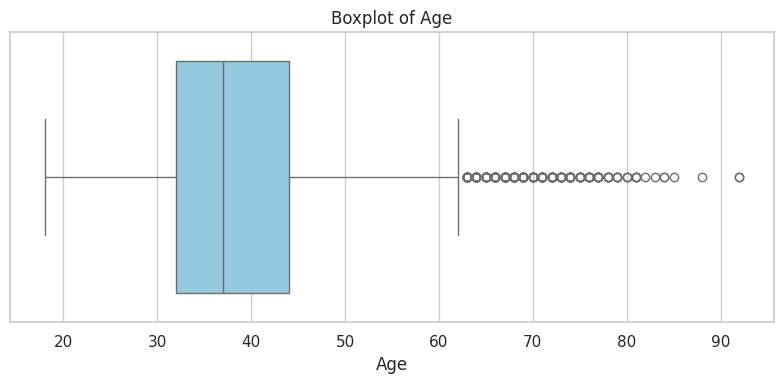

Mean (Average) Age: 38.92
Median Age: 37.0
25th Percentile (Q1): 32.0
75th Percentile (Q3): 44.0


In [9]:
# I want to see the boxplot for Age

import matplotlib.pyplot as plt
import seaborn as sns
# Set plot style
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Age'], color='skyblue')
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.tight_layout()
plt.show()

# Calculate statistics
age_median = df['Age'].median()
age_mean = df['Age'].mean()
age_25 = df['Age'].quantile(0.25)
age_75 = df['Age'].quantile(0.75)

# Print results
print(f"Mean (Average) Age: {age_mean:.2f}")
print(f"Median Age: {age_median}")
print(f"25th Percentile (Q1): {age_25}")
print(f"75th Percentile (Q3): {age_75}")



In [10]:
# Lets see what the gender data looks like
# Get the column at index 11 (0-based indexing)
gender_col = df.iloc[:, 11]

# Calculate percentage of males (1) and females (0)
gender_percent = gender_col.value_counts(normalize=True) * 100
gender_percent.index = gender_percent.index.map({1: 'Male', 0: 'Female'})

# Print the result
print("Gender Percentages:")
print(gender_percent.round(2))




Gender Percentages:
Gender_Male
Male      54.57
Female    45.43
Name: proportion, dtype: float64


In [11]:
#now lets see how many churners and non churners are in the entire dataset to get a sense of the class imbalance
#Calculate churn counts
exited_counts = df['Exited'].value_counts()
exited_counts.index = exited_counts.index.map({1: 'Churned', 0: 'Stayed'})

# Calculate churn percentages
exited_percent = df['Exited'].value_counts(normalize=True) * 100
exited_percent.index = exited_percent.index.map({1: 'Churned', 0: 'Stayed'})

# Combine both into a DataFrame for clarity
churn_summary = pd.DataFrame({
    'Count': exited_counts,
    'Percentage (%)': exited_percent.round(2)
})

# Display result
print(" Customer Churn Summary:")
print(churn_summary)


 Customer Churn Summary:
         Count  Percentage (%)
Exited                        
Stayed    7963           79.63
Churned   2037           20.37


In [12]:
df.shape

(10000, 12)

In [13]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


# **Run Models and evaluate the results along with trends in the results**

 Some thoughts before I start training the model
 Usually, this sort of data should be available in a company's database as it is mostly definable and collectable (we can easily get the values for each of the columns)
 Estimated salary is one data column that perhaps may differ in how it is being estimated, this can differ in different banking organizations
 If this was a real company dataset, I would have first aligned and defined a standardized method for the estimated salary column and then used
 Actually, now that I think about it, the bank balance variable is something that I feel is not a good reflection of whether someone will churn. Let me explain briefly
 The "Balance" column, I assume, gives the bank balance at a certain point in time (I would assume today), but people can have very variable bank balances due to
 maybe for example: A big payment received or given which is sudden and may not be reoccuring (and there can be other reasons as well)
Hence, if I am working with actual company data, I would actually smooth it:
 I would say to use moving averages, median balances, or standard deviation over time instead of raw current balance. For example: "average_balance_last_3_months"
 But since this column is already there, I will keep it in my model and if it is actually used and the column for balance would be converted to this updated variable
 For now, lets assume that the values in the column "Balance" are the results of a preproccessing done already in the company  and the values are actually "average_balance_last_3_months" for that variable

In [14]:
# Now we will start to train our ANN, first by importing all modules required
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [15]:
# Then we separate the features from our target
X_raw = df.drop(columns='Exited')  # Features
y = df['Exited']                   # Target

Now I would want to scale the features for the ANN, as the is better when data is normalized.
 Normalizing will be good as Neural networks are highly sensitive to input scales.
 If features have very different ranges (e.g., balance in the thousands vs. age in tens), the loss landscape becomes uneven, making gradient descent slower and less stable.

In [16]:
# Scaling the features
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_raw), columns=X_raw.columns)

In [17]:
# Train/Test Split

# we keep test size 0.2 as it will reserve 20% of data for unbiased model evaluation
#rest of the parameters are standard for ANN

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

 now I will use this scaled data for my ANNs  
  This first ANN will be called ANN_simple
 2 hidden layers. 7 nodes per layer
 relu activation functions and sigmoid for output layer


In [18]:
# import modules
from sklearn.model_selection import StratifiedKFold
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [19]:
# Step 1: Defining ANN_simple_threshold_0.5 model
ANN_simple_threshold_05 = Sequential()
ANN_simple_threshold_05.add(Dense(units=7, activation='relu', input_dim=X_train.shape[1]))
ANN_simple_threshold_05.add(Dense(units=7, activation='relu'))
ANN_simple_threshold_05.add(Dense(units=1, activation='sigmoid'))

# Compile and fit model
ANN_simple_threshold_05.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

ANN_simple_threshold_05.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
#  Step 2: Predict on test set and save results to use later
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = {}  # Initialize results dictionary
results['ANN_simple_threshold_05'] = {}  # Initialize specific model entry

y_true = y_test
y_prob = ANN_simple_threshold_05.predict(X_test)
y_pred = (y_prob > 0.5).astype(int)

results['ANN_simple_threshold_05']['y_true'] = y_true
results['ANN_simple_threshold_05']['y_prob'] = y_prob
results['ANN_simple_threshold_05']['y_pred'] = y_pred
results['ANN_simple_threshold_05']['metrics'] = {
    'accuracy': accuracy_score(y_true, y_pred),
    'precision': precision_score(y_true, y_pred),
    'recall': recall_score(y_true, y_pred),
    'f1_score': f1_score(y_true, y_pred)
}


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [21]:
#  Step 3: Evaluation Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(" Evaluation Metrics (Test Set)")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")

 Evaluation Metrics (Test Set)
Accuracy : 0.8595
Precision: 0.6944
Recall   : 0.5528
F1 Score : 0.6156


In [22]:
# Our model does well in accuracy but it is unable to predict churners well as the recall is only 45.9%
 # (Of all the actual churners, the model correctly identified only 45.9%).
# This can be costly if the cost of losing a customer is high

In [23]:
# To improve this, we can lower the threshold of the model. This will make the model more aggressive in labeling customers as churners, improving recall.
# We also change class weights so the model gives more weights to churners

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Define class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights_dict = dict(enumerate(class_weights))
print(" Class Weights:", class_weights_dict)

# Step 2: Define the model
ANN_simple_threshold_03_weighted = Sequential()
ANN_simple_threshold_03_weighted.add(Dense(7, activation='relu', input_dim=X_train.shape[1]))
ANN_simple_threshold_03_weighted.add(Dense(7, activation='relu'))
ANN_simple_threshold_03_weighted.add(Dense(1, activation='sigmoid'))

ANN_simple_threshold_03_weighted.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 3: Train with class weights
ANN_simple_threshold_03_weighted.fit(
    X_train, y_train,
    epochs=50, batch_size=32, verbose=0,
    class_weight=class_weights_dict
)


 Class Weights: {0: np.float64(0.6279434850863422), 1: np.float64(2.4539877300613497)}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
# Step 4: Predict using lower threshold (0.3)
results['ANN_simple_threshold_03_weighted'] = {}  # Initialize dictionary entry

y_true = y_test
y_prob = ANN_simple_threshold_03_weighted.predict(X_test)
y_pred = (y_prob > 0.3).astype(int)

results['ANN_simple_threshold_03_weighted']['y_true'] = y_true
results['ANN_simple_threshold_03_weighted']['y_prob'] = y_prob
results['ANN_simple_threshold_03_weighted']['y_pred'] = y_pred
results['ANN_simple_threshold_03_weighted']['metrics'] = {
    'accuracy': accuracy_score(y_true, y_pred),
    'precision': precision_score(y_true, y_pred),
    'recall': recall_score(y_true, y_pred),
    'f1_score': f1_score(y_true, y_pred)
}

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [26]:
#  Step 5: Evaluation Metrics
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(" Evaluation Metrics (ANN_simple_threshold_03_weighted)")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")

 Evaluation Metrics (ANN_simple_threshold_03_weighted)
Accuracy : 0.5940
Precision: 0.3231
Recall   : 0.9091
F1 Score : 0.4768


In [27]:
# This made our model predict churners very well
# The tradeoff here is that we end up saying that certain individuals will churn even if they will not (as shown by the precision value).
# If marketing costs to churners is high, then this could be a problem as we would waste money on those customers who were not going to leave anyway

In [28]:
# Okay now I am trying out a deeper ANN

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Step 1: Define the deeper ANN
ANN_deep_thresh03 = Sequential()
ANN_deep_thresh03.add(Dense(16, activation='relu', input_dim=X_train.shape[1]))
ANN_deep_thresh03.add(Dense(12, activation='relu'))
ANN_deep_thresh03.add(Dense(7, activation='relu'))
ANN_deep_thresh03.add(Dense(1, activation='sigmoid'))  # Output layer

# Step 2: Compile
ANN_deep_thresh03.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 3: Train
ANN_deep_thresh03.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Step 4: Predict
y_prob = ANN_deep_thresh03.predict(X_test)
y_pred = (y_prob > 0.3).astype(int).flatten()

# Step 5: Store results
results['ANN_deep_thresh03'] = {
    'model': ANN_deep_thresh03,
    'y_pred': y_pred,
    'y_prob': y_prob.flatten(),
    'y_true': y_test.values
}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Get true and predicted values
y_true = results['ANN_deep_thresh03']['y_true']
y_pred = results['ANN_deep_thresh03']['y_pred']

# Evaluation metrics
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Save metrics to results
results['ANN_deep_thresh03']['metrics'] = {
    'accuracy': acc,
    'precision': prec,
    'recall': rec,
    'f1_score': f1
}

# Print metrics
print(" Evaluation Metrics – ANN_deep_thresh03")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")


 Evaluation Metrics – ANN_deep_thresh03
Accuracy : 0.8530
Precision: 0.6445
Recall   : 0.6192
F1 Score : 0.6316


In [31]:
# A deeper ANN with a lower threshold (0.3) gives a more balanced output.
# I am adding XGBoost as well to evaluate it with the original ANN

In [32]:
from xgboost import XGBClassifier
import numpy as np

# Step 1: Train XGBoost (default settings)
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

xgb_model.fit(X_train, y_train)

# Step 2: Predict
y_prob = xgb_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1
y_pred = (y_prob > 0.5).astype(int)

# Step 3: Store in results
results['XGBoost_thresh05'] = {
    'model': xgb_model,
    'y_pred': y_pred,
    'y_prob': y_prob,
    'y_true': y_test.values
}


In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Get true and predicted values
y_true = results['XGBoost_thresh05']['y_true']
y_pred = results['XGBoost_thresh05']['y_pred']

# Compute metrics
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Save to results
results['XGBoost_thresh05']['metrics'] = {
    'accuracy': acc,
    'precision': prec,
    'recall': rec,
    'f1_score': f1
}

# Print
print(" Evaluation Metrics – XGBoost_thresh05")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")


 Evaluation Metrics – XGBoost_thresh05
Accuracy : 0.8530
Precision: 0.6969
Recall   : 0.4914
F1 Score : 0.5764


In [34]:
# XGBoost default looks good. Lets try it with a lower threshold

In [35]:
# Train model
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict probabilities
y_prob = xgb_model.predict_proba(X_test)[:, 1]

# Apply lower threshold (0.3)
y_pred = (y_prob > 0.3).astype(int)

# Store results
results['XGBoost_thresh03'] = {
    'model': xgb_model,
    'y_pred': y_pred,
    'y_prob': y_prob,
    'y_true': y_test.values
}

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Extract values
y_true = results['XGBoost_thresh03']['y_true']
y_pred = results['XGBoost_thresh03']['y_pred']

# Compute metrics
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Save to results
results['XGBoost_thresh03']['metrics'] = {
    'accuracy': acc,
    'precision': prec,
    'recall': rec,
    'f1_score': f1
}

# Print
print(" Evaluation Metrics – XGBoost_thresh03")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")

 Evaluation Metrics – XGBoost_thresh03
Accuracy : 0.8245
Precision: 0.5617
Recall   : 0.6265
F1 Score : 0.5923


In [37]:
# To check this trend of lower thresholds giving higher recall, I test one model: XGBoost and see the results for a threshold of 0.2

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train model
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict probabilities
y_prob = xgb_model.predict_proba(X_test)[:, 1]

# Apply lower threshold (0.2)
y_pred = (y_prob > 0.2).astype(int)

# Compute metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print
print(" Evaluation Metrics – XGBoost_thresh02")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")


 Evaluation Metrics – XGBoost_thresh02
Accuracy : 0.7840
Precision: 0.4788
Recall   : 0.6929
F1 Score : 0.5663


In [38]:
# I do it again with a threshold of 0.1

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train model
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict probabilities
y_prob = xgb_model.predict_proba(X_test)[:, 1]

# Apply lower threshold (0.1)
y_pred = (y_prob > 0.1).astype(int)

# Compute metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print
print(" Evaluation Metrics – XGBoost_thresh01")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")


 Evaluation Metrics – XGBoost_thresh01
Accuracy : 0.7100
Precision: 0.3939
Recall   : 0.7887
F1 Score : 0.5254


# **Run all models and add to the results table**

okay now what I will do is that I will have 3 types of models for each (ANN, ANN deep and XGBoost, for each three there will be one with normal threshold, lower threshold and class weights added)

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Step 1: Define model
ANN_simple_thresh03_no_weights = Sequential()
ANN_simple_thresh03_no_weights.add(Dense(7, activation='relu', input_dim=X_train.shape[1]))
ANN_simple_thresh03_no_weights.add(Dense(7, activation='relu'))
ANN_simple_thresh03_no_weights.add(Dense(1, activation='sigmoid'))

# Step 2: Compile
ANN_simple_thresh03_no_weights.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 3: Train (no class weights)
ANN_simple_thresh03_no_weights.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Step 4: Predict with threshold 0.3
y_prob = ANN_simple_thresh03_no_weights.predict(X_test)
y_pred = (y_prob > 0.3).astype(int).flatten()

# Step 5: Store in results
results['ANN_simple_thresh03_no_weights'] = {
    'model': ANN_simple_thresh03_no_weights,
    'y_pred': y_pred,
    'y_prob': y_prob.flatten(),
    'y_true': y_test.values
}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_true = results['ANN_simple_thresh03_no_weights']['y_true']
y_pred = results['ANN_simple_thresh03_no_weights']['y_pred']

acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

results['ANN_simple_thresh03_no_weights']['metrics'] = {
    'accuracy': acc,
    'precision': prec,
    'recall': rec,
    'f1_score': f1
}

print(" Evaluation Metrics – ANN_simple_thresh03_no_weights")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")


 Evaluation Metrics – ANN_simple_thresh03_no_weights
Accuracy : 0.8325
Precision: 0.5849
Recall   : 0.6093
F1 Score : 0.5969


In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Step 1: Define deep model
ANN_deep_thresh05 = Sequential()
ANN_deep_thresh05.add(Dense(16, activation='relu', input_dim=X_train.shape[1]))
ANN_deep_thresh05.add(Dense(12, activation='relu'))
ANN_deep_thresh05.add(Dense(7, activation='relu'))
ANN_deep_thresh05.add(Dense(1, activation='sigmoid'))

# Step 2: Compile
ANN_deep_thresh05.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 3: Train (no class weights)
ANN_deep_thresh05.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Step 4: Predict with threshold = 0.5
y_prob = ANN_deep_thresh05.predict(X_test)
y_pred = (y_prob > 0.5).astype(int).flatten()

# Step 5: Store in results
results['ANN_deep_thresh05'] = {
    'model': ANN_deep_thresh05,
    'y_pred': y_pred,
    'y_prob': y_prob.flatten(),
    'y_true': y_test.values
}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_true = results['ANN_deep_thresh05']['y_true']
y_pred = results['ANN_deep_thresh05']['y_pred']

acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

results['ANN_deep_thresh05']['metrics'] = {
    'accuracy': acc,
    'precision': prec,
    'recall': rec,
    'f1_score': f1
}

print(" Evaluation Metrics – ANN_deep_thresh05")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")


 Evaluation Metrics – ANN_deep_thresh05
Accuracy : 0.8585
Precision: 0.8039
Recall   : 0.4029
F1 Score : 0.5368


In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Step 1: Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))
print("Class Weights:", class_weights_dict)

# Step 2: Define the deep ANN
ANN_deep_thresh03_weighted = Sequential()
ANN_deep_thresh03_weighted.add(Dense(16, activation='relu', input_dim=X_train.shape[1]))
ANN_deep_thresh03_weighted.add(Dense(12, activation='relu'))
ANN_deep_thresh03_weighted.add(Dense(7, activation='relu'))
ANN_deep_thresh03_weighted.add(Dense(1, activation='sigmoid'))

# Step 3: Compile
ANN_deep_thresh03_weighted.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Train with class weights
ANN_deep_thresh03_weighted.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0, class_weight=class_weights_dict)

# Step 5: Predict with threshold = 0.3
y_prob = ANN_deep_thresh03_weighted.predict(X_test)
y_pred = (y_prob > 0.3).astype(int).flatten()

# Step 6: Store in results
results['ANN_deep_thresh03_weighted'] = {
    'model': ANN_deep_thresh03_weighted,
    'y_pred': y_pred,
    'y_prob': y_prob.flatten(),
    'y_true': y_test.values
}


Class Weights: {0: np.float64(0.6279434850863422), 1: np.float64(2.4539877300613497)}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_true = results['ANN_deep_thresh03_weighted']['y_true']
y_pred = results['ANN_deep_thresh03_weighted']['y_pred']

acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

results['ANN_deep_thresh03_weighted']['metrics'] = {
    'accuracy': acc,
    'precision': prec,
    'recall': rec,
    'f1_score': f1
}

print(" Evaluation Metrics – ANN_deep_thresh03_weighted")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")


 Evaluation Metrics – ANN_deep_thresh03_weighted
Accuracy : 0.6600
Precision: 0.3614
Recall   : 0.8747
F1 Score : 0.5115


In [45]:
from xgboost import XGBClassifier
import numpy as np

# Step 1: Compute class imbalance ratio
neg, pos = np.bincount(y_train)
scale_pos_weight = neg / pos
print(f"scale_pos_weight: {scale_pos_weight:.2f}")

# Step 2: Define and train the model
xgb_model = XGBClassifier(
    eval_metric='logloss',
    random_state=42,
    scale_pos_weight=scale_pos_weight
)
xgb_model.fit(X_train, y_train)

# Step 3: Predict with threshold = 0.3
y_prob = xgb_model.predict_proba(X_test)[:, 1]
y_pred = (y_prob > 0.3).astype(int)

# Step 4: Store in results
results['XGBoost_thresh03_weighted'] = {
    'model': xgb_model,
    'y_pred': y_pred,
    'y_prob': y_prob,
    'y_true': y_test.values
}


scale_pos_weight: 3.91


In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_true = results['XGBoost_thresh03_weighted']['y_true']
y_pred = results['XGBoost_thresh03_weighted']['y_pred']

acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

results['XGBoost_thresh03_weighted']['metrics'] = {
    'accuracy': acc,
    'precision': prec,
    'recall': rec,
    'f1_score': f1
}

print(" Evaluation Metrics – XGBoost_thresh03_weighted")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")


 Evaluation Metrics – XGBoost_thresh03_weighted
Accuracy : 0.7735
Precision: 0.4658
Recall   : 0.7690
F1 Score : 0.5802


In [47]:
from xgboost import XGBClassifier
import numpy as np

# Step 1: Compute class imbalance ratio
neg, pos = np.bincount(y_train)
scale_pos_weight = neg / pos
print(f"scale_pos_weight: {scale_pos_weight:.2f}")

# Step 2: Define and train the model
xgb_model = XGBClassifier(
    eval_metric='logloss',
    random_state=42,
    scale_pos_weight=scale_pos_weight
)
xgb_model.fit(X_train, y_train)

# Step 3: Predict with threshold = 0.2
y_prob = xgb_model.predict_proba(X_test)[:, 1]
y_pred = (y_prob > 0.2).astype(int)

# Step 4: evaluate using the 0.2 threshold predictions
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Evaluation Metrics – XGBoost_thresh02")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")



scale_pos_weight: 3.91
Evaluation Metrics – XGBoost_thresh02
Accuracy : 0.7095
Precision: 0.3949
Recall   : 0.8034
F1 Score : 0.5296


In [48]:
#Now to order the models correctly into our results table

final_model_order = [
    'ANN_simple_threshold_05',
    'ANN_simple_thresh03_no_weights',
    'ANN_simple_threshold_03_weighted',
    'ANN_deep_thresh05',
    'ANN_deep_thresh03',
    'ANN_deep_thresh03_weighted',
    'XGBoost_thresh05',
    'XGBoost_thresh03',
    'XGBoost_thresh03_weighted'
]


In [49]:
# Keep only selected models in the correct order
results = {k: results[k] for k in final_model_order if k in results}


Important note here: The scores for ANNss accuracy, recall, precision and F1 always change slightly whenever the code is run fresh. However, the trend is similar, therefore, the figures might be different than in the paper.
Due to this fluctuation, the profit analysis is done using XGBoost model so that the results are similar to replicate. However, in reality, all models should have similar trends in the profit analysis - recall focused should give higher profit when FP is low and so on.

In [50]:
# Reorder using .loc[]

summary_df = pd.DataFrame({
    model: res['metrics']
    for model, res in results.items()
}).T  # Transpose so models are rows

summary_df = summary_df.round(4)
summary_df = summary_df.loc[final_model_order]


print("Final Model Comparison Summary")
display(summary_df)




Final Model Comparison Summary


,accuracy,precision,recall,f1_score
ANN_simple_threshold_05,0.8595,0.6944,0.5528,0.6156
ANN_simple_thresh03_no_weights,0.8325,0.5849,0.6093,0.5969
ANN_simple_threshold_03_weighted,0.5940,0.3231,0.9091,0.4768
ANN_deep_thresh05,0.8585,0.8039,0.4029,0.5368
ANN_deep_thresh03,0.8530,0.6445,0.6192,0.6316
ANN_deep_thresh03_weighted,0.6600,0.3614,0.8747,0.5115
XGBoost_thresh05,0.8530,0.6969,0.4914,0.5764
XGBoost_thresh03,0.8245,0.5617,0.6265,0.5923
XGBoost_thresh03_weighted,0.7735,0.4658,0.7690,0.5802


# **Robustness and sensitivity checks**



In [51]:
# Now that we know which models would be the best to use for different business cases, lets check the senstivity and robustness of each

In [52]:
# Robustness and Sensitivity Checks for Selected ANN Models

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, classification_report
import numpy as np

# Extract trained models from the results dictionary
models = {
    "ANN_deep_thresh03_weighted": results["ANN_deep_thresh03_weighted"]["model"],
    "ANN_deep_thresh03": results["ANN_deep_thresh03"]["model"],
    "ANN_deep_thresh05": results["ANN_deep_thresh05"]["model"]
}

# 1. Robustness Check: CV-like stability + Input noise
print("\n ROBUSTNESS CHECK\n")

for name, model in models.items():
    print(f"\n Model: {name}")

    # K-Fold Validation (using existing model, not retraining)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    f1_scores = []

    for train_idx, val_idx in skf.split(X_train, y_train):
        X_val = X_train.iloc[val_idx]
        y_val = y_train.iloc[val_idx]
        y_pred = (model.predict(X_val).flatten() > 0.5).astype(int)
        f1_scores.append(f1_score(y_val, y_pred))

    print(f"F1 mean (CV-like): {np.mean(f1_scores):.4f}, std: {np.std(f1_scores):.4f}")

    # Add slight noise to test data
    noise = np.random.normal(0, 0.01, X_test.shape)
    X_noisy = X_test + noise
    y_pred_noisy = (model.predict(X_noisy).flatten() > 0.5).astype(int)
    f1_noisy = f1_score(y_test, y_pred_noisy)
    print(f"F1 with noisy input: {f1_noisy:.4f}")



 ROBUSTNESS CHECK


 Model: ANN_deep_thresh03_weighted
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
F1 mean (CV-like): 0.6199, std: 0.0172
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
F1 with noisy input: 0.6030

 Model: ANN_deep_thresh03
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
F1 mean (CV-like): 0.5551, std: 0.0238
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
F1 with noisy input: 0.5613

 Model: ANN_deep_thresh05
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
F1 mean (CV-like): 0.5457, std: 0.0223
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
F1 with noisy 

In [53]:
# 2. Sensitivity Check: Vary thresholds
print("\n SENSITIVITY CHECK\n")
thresholds = [0.3, 0.4, 0.5, 0.6]

for name, model in models.items():
    print(f"\n Model: {name}")
    y_prob = model.predict(X_test).flatten()

    for thresh in thresholds:
        y_pred_thresh = (y_prob > thresh).astype(int)
        print(f"\nThreshold = {thresh}")
        print(classification_report(y_test, y_pred_thresh, zero_division=0))
    print("=" * 60)


 SENSITIVITY CHECK


 Model: ANN_deep_thresh03_weighted
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Threshold = 0.3
              precision    recall  f1-score   support

           0       0.95      0.61      0.74      1593
           1       0.36      0.87      0.51       407

    accuracy                           0.66      2000
   macro avg       0.66      0.74      0.63      2000
weighted avg       0.83      0.66      0.69      2000


Threshold = 0.4
              precision    recall  f1-score   support

           0       0.94      0.73      0.82      1593
           1       0.43      0.82      0.57       407

    accuracy                           0.74      2000
   macro avg       0.69      0.77      0.69      2000
weighted avg       0.84      0.74      0.77      2000


Threshold = 0.5
              precision    recall  f1-score   support

           0       0.92      0.82      0.87      1593
           1       0.52      0.74      0.61       407

    accuracy                       

In [54]:
#checking robustness and sensitivity for xgboost models

In [55]:
from sklearn.metrics import roc_auc_score
import pandas as pd

# Add AUC to each model's metrics
for model_key in ['XGBoost_thresh05', 'XGBoost_thresh03', 'XGBoost_thresh03_weighted']:
    y_true = results[model_key]['y_true']
    y_prob = results[model_key]['y_prob']
    auc = roc_auc_score(y_true, y_prob)
    results[model_key]['metrics']['auc'] = auc

# Convert to DataFrame
metrics_df = pd.DataFrame({
    model_key: results[model_key]['metrics']
    for model_key in results
}).T

# Display
print(" Robustness Summary Across Models")
display(metrics_df)


 Robustness Summary Across Models


,accuracy,precision,recall,f1_score,auc
ANN_simple_threshold_05,0.8595,0.694444,0.552826,0.615595,NaN
ANN_simple_thresh03_no_weights,0.8325,0.584906,0.609337,0.596871,NaN
ANN_simple_threshold_03_weighted,0.5940,0.323144,0.909091,0.476804,NaN
ANN_deep_thresh05,0.8585,0.803922,0.402948,0.536825,NaN
ANN_deep_thresh03,0.8530,0.644501,0.619165,0.631579,NaN
ANN_deep_thresh03_weighted,0.6600,0.361421,0.874693,0.511494,NaN
XGBoost_thresh05,0.8530,0.696864,0.491400,0.576369,0.829285
XGBoost_thresh03,0.8245,0.561674,0.626536,0.592334,0.829285
XGBoost_thresh03_weighted,0.7735,0.465774,0.769042,0.580167,0.835760


In [56]:
from sklearn.metrics import roc_auc_score
import pandas as pd

# List of ANN model keys
ann_model_keys = [
    'ANN_simple_threshold_05',
    'ANN_simple_thresh03_no_weights',
    'ANN_simple_threshold_03_weighted',
    'ANN_deep_thresh05',
    'ANN_deep_thresh03',
    'ANN_deep_thresh03_weighted'
]

# Compute and add AUC for each ANN model
for model_key in ann_model_keys:
    y_true = results[model_key]['y_true']
    y_prob = results[model_key]['y_prob']
    auc = roc_auc_score(y_true, y_prob)
    results[model_key]['metrics']['auc'] = auc

# Re-create DataFrame for all models
metrics_df = pd.DataFrame({
    model_key: results[model_key]['metrics']
    for model_key in results
}).T

# Display table
print(" Updated Robustness Summary Across Models")
print(metrics_df)


 Updated Robustness Summary Across Models
                                  accuracy  precision    recall  f1_score  \
ANN_simple_threshold_05             0.8595   0.694444  0.552826  0.615595   
ANN_simple_thresh03_no_weights      0.8325   0.584906  0.609337  0.596871   
ANN_simple_threshold_03_weighted    0.5940   0.323144  0.909091  0.476804   
ANN_deep_thresh05                   0.8585   0.803922  0.402948  0.536825   
ANN_deep_thresh03                   0.8530   0.644501  0.619165  0.631579   
ANN_deep_thresh03_weighted          0.6600   0.361421  0.874693  0.511494   
XGBoost_thresh05                    0.8530   0.696864  0.491400  0.576369   
XGBoost_thresh03                    0.8245   0.561674  0.626536  0.592334   
XGBoost_thresh03_weighted           0.7735   0.465774  0.769042  0.580167   

                                       auc  
ANN_simple_threshold_05           0.862426  
ANN_simple_thresh03_no_weights    0.855648  
ANN_simple_threshold_03_weighted  0.853326  
ANN_dee

In [57]:
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5]
sensitivity_results = []

y_true = results['XGBoost_thresh03']['y_true']
y_prob = results['XGBoost_thresh03']['y_prob']

for t in thresholds:
    y_pred = (y_prob > t).astype(int)
    metrics = {
        'Threshold': t,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred),
    }
    sensitivity_results.append(metrics)

# Convert to DataFrame
sensitivity_df = pd.DataFrame(sensitivity_results)

# Display
print(" Sensitivity Check – Varying Thresholds for XGBoost_thresh03")
display(sensitivity_df)


 Sensitivity Check – Varying Thresholds for XGBoost_thresh03


,Threshold,Accuracy,Precision,Recall,F1 Score
0,0.1,0.7100,0.393865,0.788698,0.525368
1,0.2,0.7840,0.478778,0.692875,0.566265
2,0.3,0.8245,0.561674,0.626536,0.592334
3,0.4,0.8385,0.617318,0.542998,0.577778
4,0.5,0.8530,0.696864,0.491400,0.576369


### **Profit Analysis **

----- Baseline (No Model) Business Value -----
Churners (False Negatives): 407
Non-Churners (True Negatives): 1593
Total Baseline Profit/Loss: €-101750

----- Baseline (No Model) Business Value Confusion Matrix -----


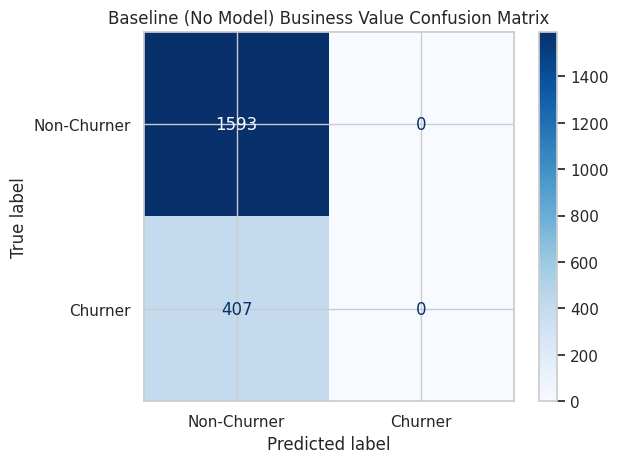

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Load true labels from test set
y_true = results['XGBoost_thresh03_weighted']['y_true']

# Count churners and non-churners
num_churners = np.sum(y_true == 1)     # All churners are missed (False Negatives)
num_non_churners = np.sum(y_true == 0) # No loyal customers contacted (True Negatives)

# Cost model (retail banking context)
COST_TP = 225     # Benefit of saving a churner
COST_FP = -25       # Cost of unnecessary outreach
COST_FN = -250    # Cost of losing a churner
COST_TN = 0        # No cost for loyal customers ignored

# Baseline (no model): no one is predicted or contacted
TP = 0
FP = 0
FN = num_churners
TN = num_non_churners

# Calculate total profit/loss
baseline_profit = (TP * COST_TP) + (FP * COST_FP) + (FN * COST_FN) + (TN * COST_TN)

# Print results
print("----- Baseline (No Model) Business Value -----")
print(f"Churners (False Negatives): {FN}")
print(f"Non-Churners (True Negatives): {TN}")
print(f"Total Baseline Profit/Loss: €{baseline_profit}")

# Simulated confusion matrix (since the model predicts no one as churner)
# True labels: y_true
# Predicted labels: all zeros (predict everyone as non-churner)
y_pred_baseline = np.zeros_like(y_true)

# Plot confusion matrix
print("\n----- Baseline (No Model) Business Value Confusion Matrix -----")
ConfusionMatrixDisplay.from_predictions(
    y_true, y_pred_baseline,
    display_labels=['Non-Churner', 'Churner'],
    cmap='Blues'
)
plt.title("Baseline (No Model) Business Value Confusion Matrix")
plt.show()


Confusion Matrix:
TP: 313, FP: 359, FN: 94, TN: 1234
Total Business Value (Profit/Loss) using XGBoost_thresh03_weighted: €37950


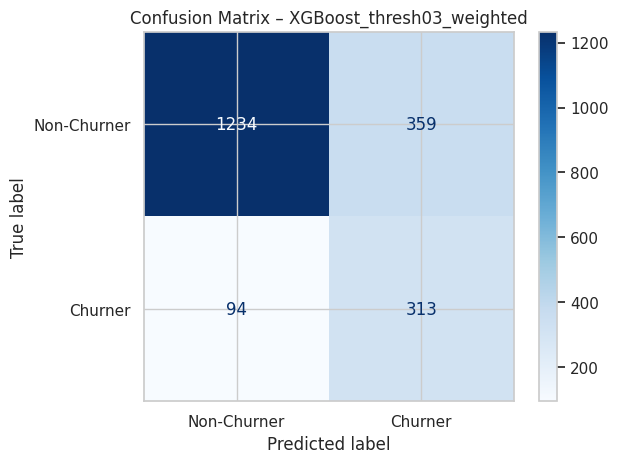

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load predictions and true labels
y_true = results['XGBoost_thresh03_weighted']['y_true']
y_pred = results['XGBoost_thresh03_weighted']['y_pred']

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
TN, FP, FN, TP = cm.ravel()

# Cost model (retail banking context)
COST_TP = 225      # Benefit of saving a churner
COST_FP = -25     # Cost of unnecessary outreach
COST_FN = -250     # Cost of losing a churner
COST_TN = 0        # No cost for loyal customers ignored

# Compute total profit
total_profit = (TP * COST_TP) + (FP * COST_FP) + (FN * COST_FN) + (TN * COST_TN)

# Display results
print("Confusion Matrix:")
print(f"TP: {TP}, FP: {FP}, FN: {FN}, TN: {TN}")
print(f"Total Business Value (Profit/Loss) using XGBoost_thresh03_weighted: €{total_profit}")

# Plot confusion matrix using sklearn's standard layout
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Churner', 'Churner'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix – XGBoost_thresh03_weighted")
plt.show()


Confusion Matrix:
TP: 200, FP: 87, FN: 207, TN: 1506
Total Business Value (Profit/Loss) using XGBoost_thresh05: €-8925


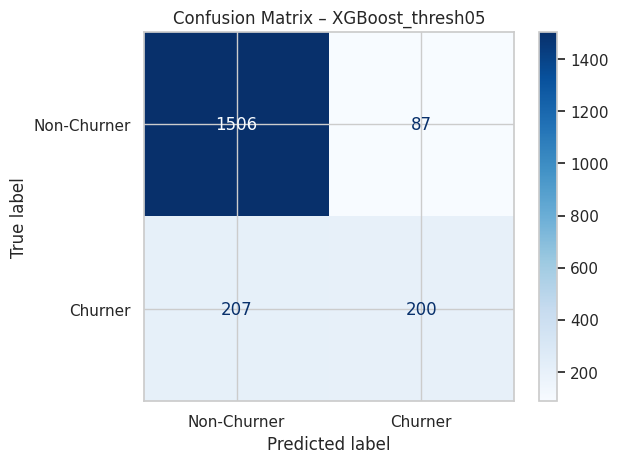

In [60]:
from sklearn.metrics import confusion_matrix

# Load predictions and true labels
y_true = results['XGBoost_thresh05']['y_true']
y_pred = results['XGBoost_thresh05']['y_pred']

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
TN, FP, FN, TP = cm.ravel()

# Cost model (retail banking context)
COST_TP = 225      # Benefit of saving a churner
COST_FP = -25     # Cost of unnecessary outreach
COST_FN = -250     # Cost of losing a churner
COST_TN = 0        # No cost for loyal customers ignored

# Compute total profit
total_profit = (TP * COST_TP) + (FP * COST_FP) + (FN * COST_FN) + (TN * COST_TN)

# Display results
print("Confusion Matrix:")
print(f"TP: {TP}, FP: {FP}, FN: {FN}, TN: {TN}")
print(f"Total Business Value (Profit/Loss) using XGBoost_thresh05: €{total_profit}")

# Plot confusion matrix using sklearn's standard layout
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Churner', 'Churner'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix – XGBoost_thresh05")
plt.show()


In [61]:
# Now we test hypothetical values of FP and FN and TP to see if the precision model improves when FP is very high and FN is low

----- Baseline (No Model) Business Value -----
Churners (False Negatives): 407
Non-Churners (True Negatives): 1593
Total Baseline Profit/Loss: €-162800

----- Baseline (No Model) Business Value Confusion Matrix -----


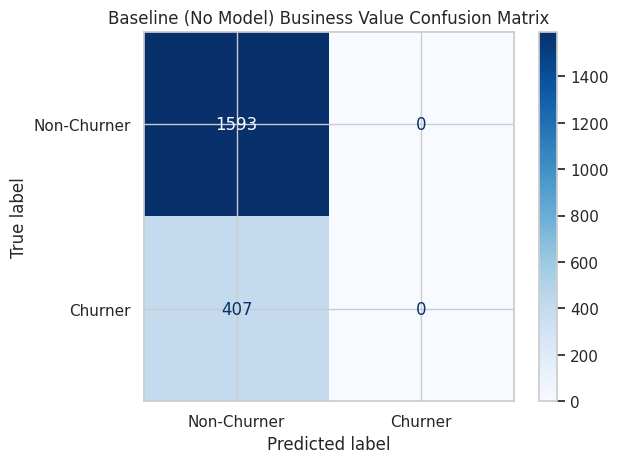

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Load true labels from test set
# Replace this line with your actual data if needed
y_true = results['XGBoost_thresh03_weighted']['y_true']

# Count churners and non-churners
num_churners = np.sum(y_true == 1)     # All churners are missed (False Negatives)
num_non_churners = np.sum(y_true == 0) # No loyal customers contacted (True Negatives)

# Cost model (retail banking context)
COST_TP = 150     # Benefit of saving a churner
COST_FP = -250       # Cost of unnecessary outreach
COST_FN = -400    # Cost of losing a churner
COST_TN = 0        # No cost for loyal customers ignored

# Baseline (no model): no one is predicted or contacted
TP = 0
FP = 0
FN = num_churners
TN = num_non_churners

# Calculate total profit/loss
baseline_profit = (TP * COST_TP) + (FP * COST_FP) + (FN * COST_FN) + (TN * COST_TN)

# Print results
print("----- Baseline (No Model) Business Value -----")
print(f"Churners (False Negatives): {FN}")
print(f"Non-Churners (True Negatives): {TN}")
print(f"Total Baseline Profit/Loss: €{baseline_profit}")

# Simulated confusion matrix (since the model predicts no one as churner)
# True labels: y_true
# Predicted labels: all zeros (predict everyone as non-churner)
y_pred_baseline = np.zeros_like(y_true)

# Plot confusion matrix
print("\n----- Baseline (No Model) Business Value Confusion Matrix -----")
ConfusionMatrixDisplay.from_predictions(
    y_true, y_pred_baseline,
    display_labels=['Non-Churner', 'Churner'],
    cmap='Blues'
)
plt.title("Baseline (No Model) Business Value Confusion Matrix")
plt.show()


Confusion Matrix:
TP: 313, FP: 359, FN: 94, TN: 1234
Total Business Value (Profit/Loss) using XGBoost_thresh03_weighted: €-80400


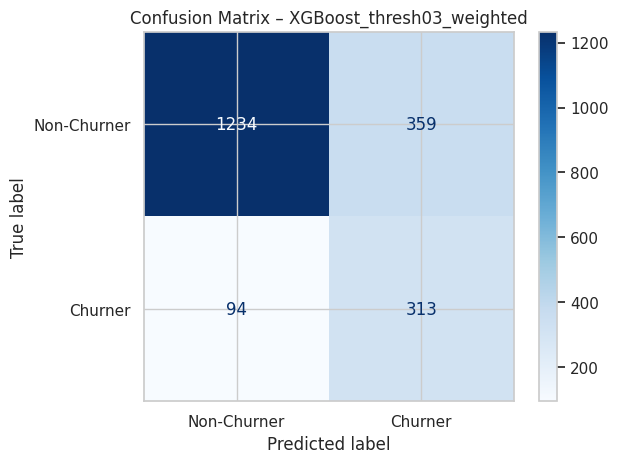

In [63]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load predictions and true labels
y_true = results['XGBoost_thresh03_weighted']['y_true']
y_pred = results['XGBoost_thresh03_weighted']['y_pred']

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
TN, FP, FN, TP = cm.ravel()

# Cost model (retail banking context)
COST_TP = 150     # Benefit of saving a churner
COST_FP = -250       # Cost of unnecessary outreach
COST_FN = -400    # Cost of losing a churner
COST_TN = 0        # No cost for loyal customers ignored

# Compute total profit
total_profit = (TP * COST_TP) + (FP * COST_FP) + (FN * COST_FN) + (TN * COST_TN)

# Display results
print("Confusion Matrix:")
print(f"TP: {TP}, FP: {FP}, FN: {FN}, TN: {TN}")
print(f"Total Business Value (Profit/Loss) using XGBoost_thresh03_weighted: €{total_profit}")

# Plot confusion matrix using sklearn's standard layout
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Churner', 'Churner'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix – XGBoost_thresh03_weighted")
plt.show()


Confusion Matrix:
TP: 200, FP: 87, FN: 207, TN: 1506
Total Business Value (Profit/Loss) using XGBoost_thresh05: €-74550


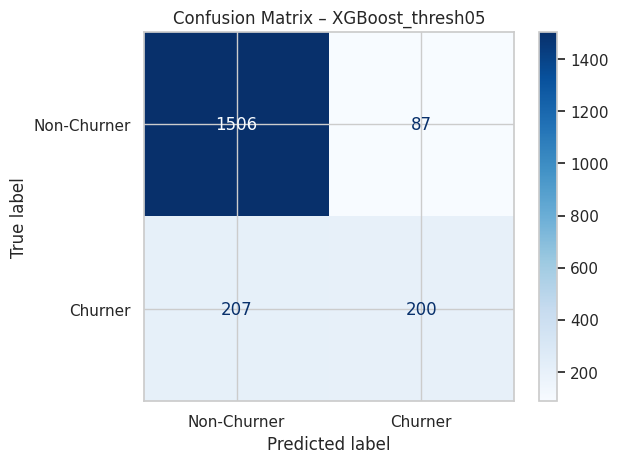

In [64]:
from sklearn.metrics import confusion_matrix

# Load predictions and true labels
y_true = results['XGBoost_thresh05']['y_true']
y_pred = results['XGBoost_thresh05']['y_pred']

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
TN, FP, FN, TP = cm.ravel()

# Cost model (retail banking context)
COST_TP = 150     # Benefit of saving a churner
COST_FP = -250       # Cost of unnecessary outreach
COST_FN = -400    # Cost of losing a churner
COST_TN = 0        # No cost for loyal customers ignored

# Compute total profit
total_profit = (TP * COST_TP) + (FP * COST_FP) + (FN * COST_FN) + (TN * COST_TN)

# Display results
print("Confusion Matrix:")
print(f"TP: {TP}, FP: {FP}, FN: {FN}, TN: {TN}")
print(f"Total Business Value (Profit/Loss) using XGBoost_thresh05: €{total_profit}")

# Plot confusion matrix using sklearn's standard layout
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Churner', 'Churner'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix – XGBoost_thresh05")
plt.show()


Thank you